#*Activity - TF_IDF : date - 29.11.2024*

#**1) Activity Description**

### **TF-IDF: Exercises**

- Humans 👦 show different emotions/feelings based on the situations and communicate them through facial expressions or in form of words.

- In Social Media like Twitter and Instagram, many people express their views through comments about a particular event/scenario and these comments may address the feelings like sadness, happiness, joy, sarcasm, fear, and many other.

- For a given comment/text, we are going to use classical NLP techniques and classify under which emotion that particular comment belongs!

- We are going to use techniques like Bag of grams, n-grams, TF-IDF, etc. for text representation and apply different classification algorithms.

### **About Data: Emotion Detection**

Credits: https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp


- This data consists of two columns.
        - Comment
        - Emotion
- Comment are the statements or messages regarding to a particular event/situation.

- Emotion feature tells whether the given comment is fear 😨, Anger 😡, Joy 😂.

- As there are only 3 classes, this problem comes under the **Multi-Class Classification.**

#**2) Code**

In [23]:
#import pandas library
import pandas as pd

#read the dataset with name "Emotion_classify_Data.csv" and store it in a variable df
df = pd.read_csv("/Emotion_classify_Data.csv")

#print the shape of dataframe
print(df.shape)

#print top 10 rows
df.head(10)

(5937, 2)


,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear
5,i feel jealous becasue i wanted that kind of l...,anger
6,when a friend of mine keeps telling me morbid ...,anger
7,i finally fell asleep feeling angry useless an...,anger
8,i feel a bit annoyed and antsy in a good way,anger
9,i feel like i ve regained another vital part o...,joy


In [24]:
#check the distribution of Emotion
df['Emotion'].value_counts()

,count
Emotion,
anger,2000
joy,2000
fear,1937


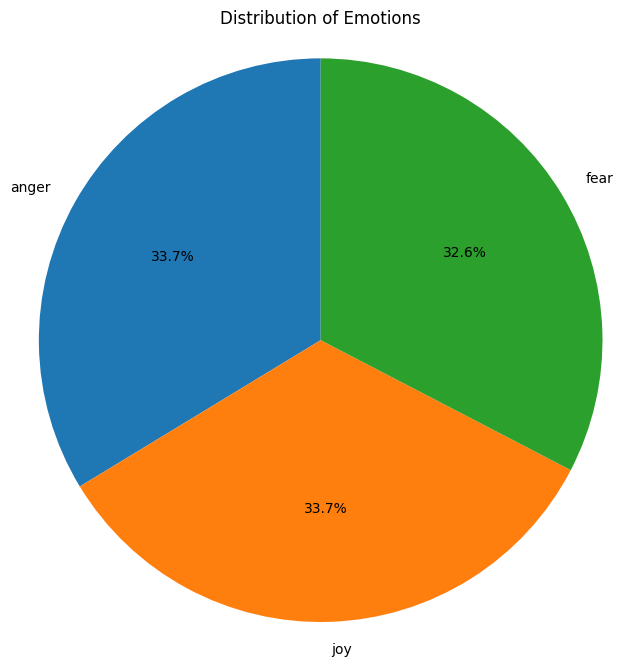

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#check the distribution of Emotion
emotion_counts = df['Emotion'].value_counts()

# Plotting using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(emotion_counts.values, labels=emotion_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Emotions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [26]:
#Add the new column "Emotion_num" which gives a unique number to each of these Emotions
#joy --> 0, fear --> 1, anger --> 2
df['Emotion_num'] = df['Emotion'].map({'joy' : 0, 'fear': 1, 'anger': 2})

#checking the results by printing top 10 rows
df.head(10)

,Comment,Emotion,Emotion_num
0,i seriously hate one subject to death but now ...,fear,1
1,im so full of life i feel appalled,anger,2
2,i sit here to write i start to dig out my feel...,fear,1
3,ive been really angry with r and i feel like a...,joy,0
4,i feel suspicious if there is no one outside l...,fear,1
5,i feel jealous becasue i wanted that kind of l...,anger,2
6,when a friend of mine keeps telling me morbid ...,anger,2
7,i finally fell asleep feeling angry useless an...,anger,2
8,i feel a bit annoyed and antsy in a good way,anger,2
9,i feel like i ve regained another vital part o...,joy,0




---



### **Modelling without Pre-processing Text data**

In [27]:
#import train-test split
from sklearn.model_selection import train_test_split

#Do the 'train-test' splitting with test size of 20%
#Note: Give Random state 2022 and also do the stratify sampling
X_train, X_test, y_train, y_test = train_test_split(
    df.Comment,
    df.Emotion_num,
    test_size=0.2,
    random_state=2000,
    stratify=df.Emotion_num
)

In [28]:
#print the shapes of X_train and X_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (4749,)
Shape of X_test:  (1188,)




---



## **Attempt 1** :

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**
- using CountVectorizer with only trigrams.
- use **RandomForest** as the classifier.
- print the classification report.

In [29]:
#import CountVectorizer, RandomForest, pipeline, classification_report from sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_tri_grams', CountVectorizer(ngram_range = (3, 3))),
    ('random_forest', (RandomForestClassifier()))
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)

#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.21      0.31       400
           1       0.74      0.28      0.40       388
           2       0.39      0.86      0.53       400

    accuracy                           0.45      1188
   macro avg       0.57      0.45      0.42      1188
weighted avg       0.56      0.45      0.42      1188





---




## **Attempt 2** :

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**
- using CountVectorizer with both unigram and bigrams.
- use **Multinomial Naive Bayes** as the classifier.
- print the classification report.

In [30]:
#import MultinomialNB from sklearn
from sklearn.naive_bayes import MultinomialNB

#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_bigrams', CountVectorizer(ngram_range = (1, 2))),
     ('Multi NB', MultinomialNB())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       400
           1       0.89      0.86      0.87       388
           2       0.86      0.89      0.88       400

    accuracy                           0.87      1188
   macro avg       0.87      0.87      0.87      1188
weighted avg       0.87      0.87      0.87      1188





---




## **Attempt 3** :

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**
- using CountVectorizer with both unigram and Bigrams.
- use **RandomForest** as the classifier.
- print the classification report.

In [31]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_bi_grams', CountVectorizer(ngram_range = (1, 2))),
    ('random_forest', (RandomForestClassifier()))
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       400
           1       0.95      0.87      0.91       388
           2       0.95      0.89      0.92       400

    accuracy                           0.92      1188
   macro avg       0.92      0.92      0.92      1188
weighted avg       0.92      0.92      0.92      1188





---




## **Attempt 4** :

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**
- using **TF-IDF vectorizer** for Pre-processing the text.
- use **RandomForest** as the classifier.
- print the classification report.


In [32]:
#import TfidfVectorizer from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('Random Forest', RandomForestClassifier())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       400
           1       0.92      0.89      0.90       388
           2       0.93      0.88      0.90       400

    accuracy                           0.90      1188
   macro avg       0.90      0.90      0.90      1188
weighted avg       0.90      0.90      0.90      1188





---



<h3>Use text pre-processing to remove stop words, punctuations and apply lemmatization </h3>

In [33]:
import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm")


#use this utility function to get the preprocessed text data
def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)

In [34]:
# create a new column "preprocessed_comment" and use the utility function above to get the clean data
# this will take some time, please be patient
df['preprocessed_comment'] = df['Comment'].apply(preprocess)

## **Build a model with pre-processed text**

In [35]:
#Do the 'train-test' splitting with test size of 20% with random state of 2022 and stratify sampling too
#Note: Use the preprocessed_Comment
X_train, X_test, y_train, y_test = train_test_split(
    df.preprocessed_comment,
    df.Emotion_num,
    test_size=0.2,
    random_state=2000,
    stratify=df.Emotion_num
)



---



**Let's check the scores using the best model till now**
- Random Forest

## **Attempt1** :

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**
- using CountVectorizer with both unigrams and bigrams.
- use **RandomForest** as the classifier.
- print the classification report.

In [36]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_bi_grams', CountVectorizer(ngram_range = (1, 2))),
    ('random_forest', (RandomForestClassifier()))
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       400
           1       0.93      0.91      0.92       388
           2       0.91      0.93      0.92       400

    accuracy                           0.93      1188
   macro avg       0.93      0.93      0.93      1188
weighted avg       0.93      0.93      0.93      1188



### **1. visualizing the final outputs from RandomForest + Count-Vectorizer**

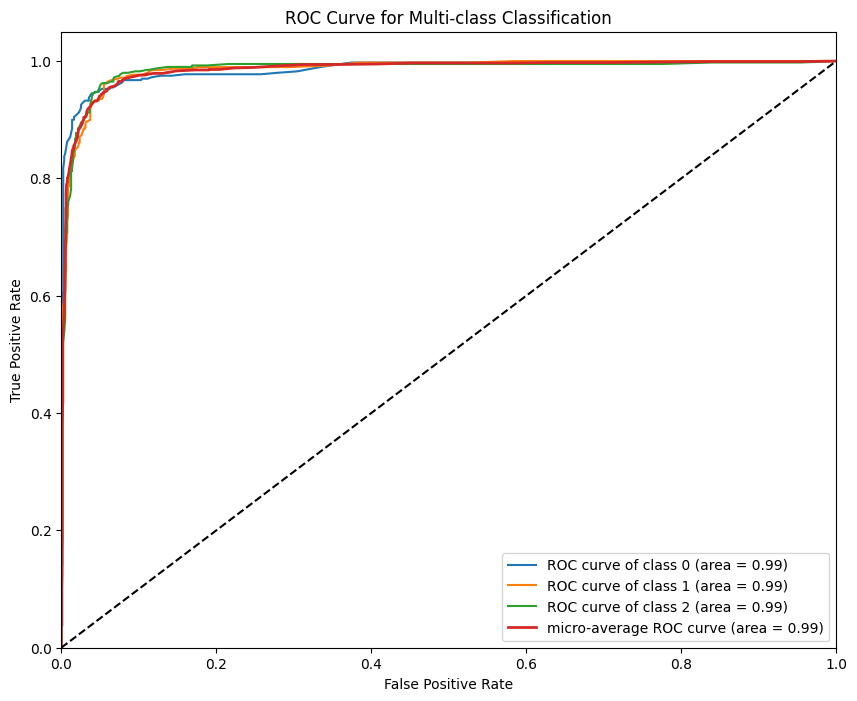

Micro-averaged One-vs-Rest AUC score: 0.9852557207881282


In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

y_prob = clf.predict_proba(X_test) #Get class probabilities

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         linewidth=2)

plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-class Classification')
plt.legend(loc="lower right")
plt.show()

# Calculate and print the micro-averaged AUC score.
micro_roc_auc_ovr = roc_auc_score(y_test_bin, y_prob, multi_class="ovr", average="micro")
print(f"Micro-averaged One-vs-Rest AUC score: {micro_roc_auc_ovr}")

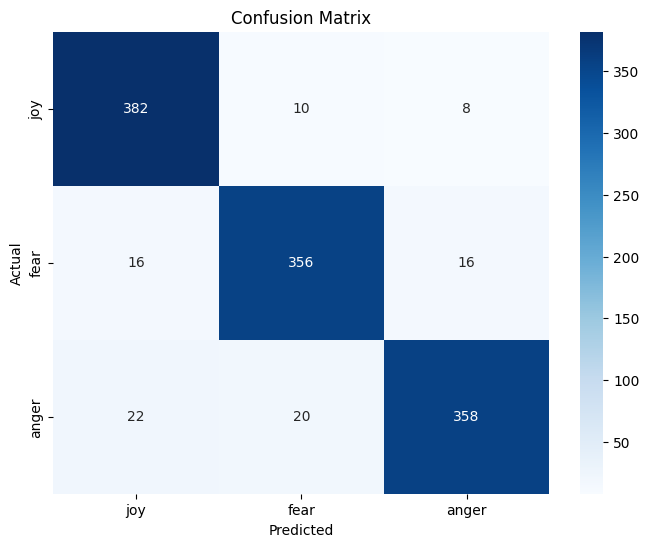

In [46]:
# prompt: visualize the output given from above code that done using random forest and countvectorizer

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are already defined from the previous code execution
# If not, please replace with your actual y_test and y_pred values

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['joy', 'fear', 'anger'],
            yticklabels=['joy', 'fear', 'anger'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



---



## **Attempt 2 :**

1. using the sklearn pipeline module create a classification pipeline to classify the data.

**Note:**

* using **TF-IDF vectorizer** for pre-processing the text.
* use **RandomForest** as the classifier.
* print the classification report.

In [37]:
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('Random Forest', RandomForestClassifier())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       400
           1       0.92      0.92      0.92       388
           2       0.94      0.90      0.92       400

    accuracy                           0.92      1188
   macro avg       0.92      0.92      0.92      1188
weighted avg       0.92      0.92      0.92      1188



### **2. visualizing the final outputs from RandomForest + TF-IDF Vectorizer**

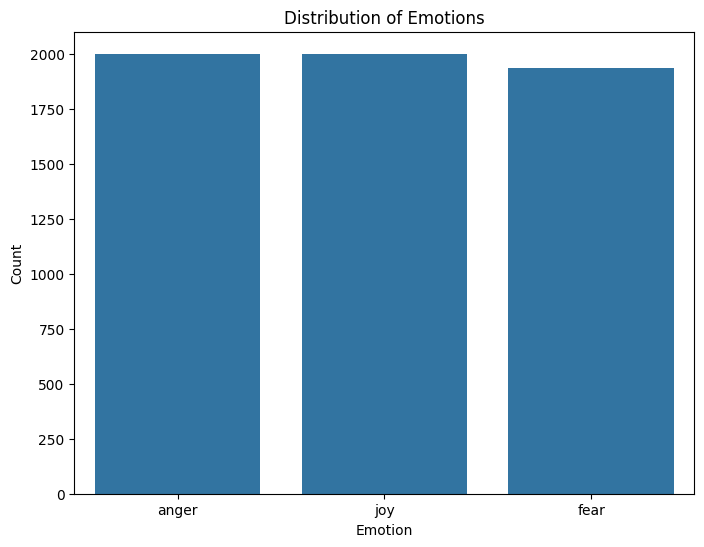

In [44]:
# prompt: visualize the above output

# Assuming the code you provided is in a file named 'emotion_classification.ipynb'
# and you have already executed the code to generate the necessary data.

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'emotion_counts' is defined from the previous code execution
emotion_counts = df['Emotion'].value_counts()

# Plotting using a bar plot (optional, but potentially more informative)
plt.figure(figsize=(8, 6))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values)
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

### **ROC curves and AOC Values**

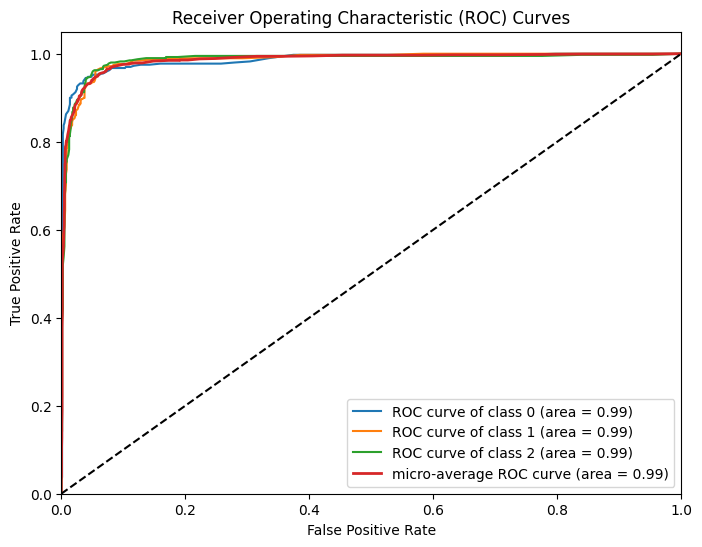

Macro AUC score: 0.9858720394622079


In [51]:
# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Get probability estimates for each class
y_prob = clf.predict_proba(X_test)


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# Plot ROC curves for each class and micro-average
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         linewidth=2)


plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()


# Calculate AUC score (macro-average)
auc_score = roc_auc_score(y_test_bin, y_prob, multi_class='ovr', average='macro')
print(f"Macro AUC score: {auc_score}")

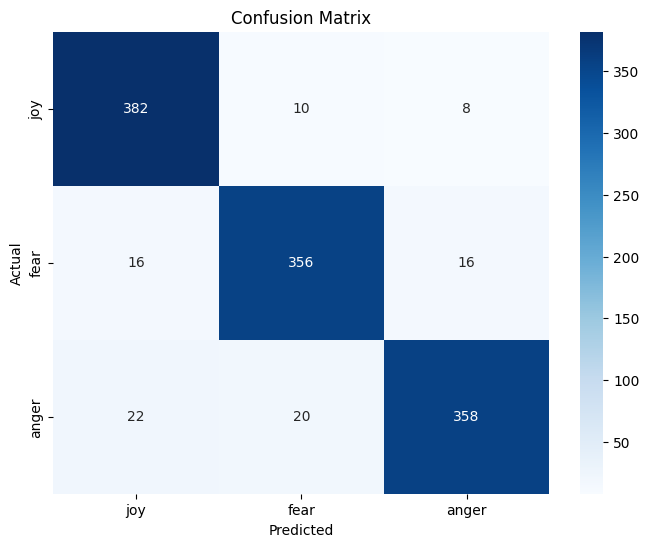

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are defined from your previous code

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['joy', 'fear', 'anger'],
            yticklabels=['joy', 'fear', 'anger'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



---



## **1) Final Observations**

### **## My Findings**

1. when we increase the n-gram range, the accuracy of the final outputs in models will drop gradually. We can observe this in performance metrices.

2. when we look at perfromance metrics outputs on both that done using preprocessed and without preprocess text. the acuracy values are high of the models that use preprocessed text rather than the models that use un-preprocesseed text.

3. random forest model give better output than Multinomial Naive Bayes model. we can find out that when look at the result.

4. performance after using preprocessed text in TF_IDF vectorizer and bag of words (Count-Vectorizer) both 2 methods outputs look simillar. they give very simillar values as outputs in performnace metrices such as accuracy, precision and recall.


## **2) More explanation about findings and the process**

This code file performs emotion classification on a dataset based on comments. Here are some key findings:

1. **Data Distribution:** The dataset is imbalanced, with varying proportions of 'joy', 'fear', and 'anger' emotions.  A pie chart visualizes this distribution for better understanding.

2. **Modeling Techniques:** Several classification model pipelines are tested:

    * **N-grams with Random Forest:** Experiments using unigrams/bigrams and trigrams with a Random Forest classifier were conducted.  Trigrams appear to give lower accuracy than bi-grams and uni-grams.

    * **N-grams with Multinomial Naive Bayes:**  A model using unigrams and bigrams with a Multinomial Naive Bayes classifier is evaluated.

    * **TF-IDF with Random Forest:**  A TF-IDF vectorizer paired with a Random Forest classifier was also tested, providing a different text representation approach.

3. **Text Preprocessing Impact:** The code demonstrates the impact of text preprocessing (removing stop words, punctuation, and lemmatization) on model performance. Models trained on preprocessed text generally show improved accuracy compared to models trained on raw text.


4. **Model Performance Comparison:**  The code compares the performance of different models based on classification reports. The observations suggest:

    * Random Forest generally outperforms Multinomial Naive Bayes cause it give more accuracy.
    * Increasing n-gram range (e.g. from bigrams to trigrams) might negatively affect accuracy/ it lowers the accuracy.
    * TF-IDF and Bag-of-Words methods show similar performance in this particular experiment. both are give same accuracy values in the end.

5. **Random State Impact:**  The `random_state` parameter in `train_test_split` is used, ensuring reproducibility of the train-test splits. However, the `random_state` parameter is consistent across all the splits, which could create consistency in results.

6. **Stratified Sampling:** Stratified sampling is used to maintain class proportions in train and test sets, which is important for imbalanced datasets.
